# Machine Learning

# Home Assignment 1


Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

Импортируем данные и небходимые пакеты:

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
data_1 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, sep=',', names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

### Вопрос 1
Сколько мужчин и женщин в выборке?

Считаем значения, разделяя людей по полу:

In [5]:
data_1['sex'].value_counts()  

Male      21790
Female    10771
Name: sex, dtype: int64

Ответ: 21790 мужчин и 10771 женщин

### Вопрос 2
Каков средний возраст мужчин?


Выделяем мужчин в отдельную категорию:

In [6]:
males = data_1[data_1['sex'] == 'Male'] 

Считаем средний возраст:

In [7]:
males['age'].mean() 

39.43354749885268

Ответ: средний возраст мужчин - примерно 39.4 года

### Вопрос 3
Какова доля граждан США?

Выделяем в отдельную категорию граждан США:

In [8]:
usa = data_1[data_1['native-country'] == 'United-States'].shape 
number_us = usa[0]

Берём общее число людей:

In [9]:
all_cit = data_1['native-country'].shape 
number_all = all_cit[0]

Считаем долю:

In [10]:
ratio = number_us / number_all 

In [11]:
print("Доля граждан США - " + str(ratio))

Доля граждан США - 0.895857006848684


Ещё раз, только в процентах:

In [12]:
ratio_percentage = ratio * 100 

In [13]:
print("Граждане США составляют " + str(ratio_percentage) + ' %')

Граждане США составляют 89.5857006848684 %


### Вопрос 4 
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

Группируем людей по уровню их образования:

In [14]:
edu_data = data_1.groupby('education')['education-num'].count() 

Строим график:

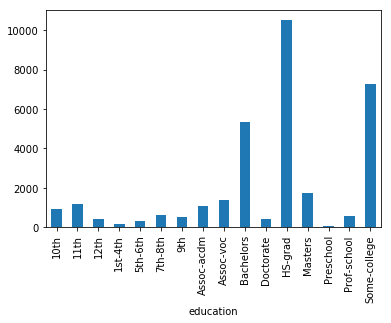

In [15]:
edu_data.plot.bar() 
plt.show()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

Выделяем в отдельную группу разведённых людей:

In [16]:
divorced = data_1[data_1['marital-status'] == 'Divorced'] 

Считаем среднее:

In [17]:
divorced['fnlwgt'].mean() 

185802.79045689848

Считаем отклонение:

In [18]:
divorced['fnlwgt'].std() 

105646.78945933603

### Вопрос 6 
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Я считала за высшее образование людей, окончивших Colleges, бакалавров, магистров и докторантов.

Для начала выделяем в отдельную категорию тех, кто зарабатывает больше 50 тыс.:

In [19]:
much_money = data_1[data_1['50K'] == '>50K'].shape[0]

Далее выделяем в отдельную категорию тех, кто и зарабатывает более 50 тыс., и имеет высшее образование:

In [20]:
money_and_edu = data_1[((data_1['education'] == 'Some-college') | 
       (data_1['education'] == 'Bachelors') | (data_1['education'] == 'Masters') | 
      (data_1['education'] == 'Doctorate')) & (data_1['50K'] == '>50K')].shape[0]

In [21]:
if money_and_edu > 0.5 * much_money:
    print("Больше половины людей, которые зарабатывают более 50 тыс., имеют высшее образование")
elif money_and_edu == 0.5 * much_money:
    print("Все те, кто имеют высшее образование, зарабатывают более 50 тыс.")
else:
    print("Меньше половины людей, которые зарабатывают более 50 тыс., имеют высшее образование")

Больше половины людей, которые зарабатывают более 50 тыс., имеют высшее образование


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

Группируем данные по расе и полу, выделяя максимальный возраст из каждой группы:

In [22]:
data_1.groupby(['race','sex'], as_index = False)['age'].max()

,race,sex,age
0,Amer-Indian-Eskimo,Female,80
1,Amer-Indian-Eskimo,Male,82
2,Asian-Pac-Islander,Female,75
3,Asian-Pac-Islander,Male,90
4,Black,Female,90
5,Black,Male,90
6,Other,Female,74
7,Other,Male,77
8,White,Female,90
9,White,Male,90


### Вопрос 8 
Люди из каких стран работают как фермеры/рыбаки?

Выделяем в отдельную категорию фермеров и рыбаков, затем группируем по стране:

In [23]:
farmersfishers = data_1[data_1['occupation'] == 'Farming-fishing']
their_country = farmersfishers.groupby('native-country')

In [24]:
their_country.groups.keys()

dict_keys(['?', 'Cambodia', 'Canada', 'Cuba', 'El-Salvador', 'England', 'France', 'Germany', 'Guatemala', 'Hong', 'Ireland', 'Italy', 'Japan', 'Mexico', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'United-States', 'Vietnam', 'Yugoslavia'])

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


Выделяем отдельно женщин-бакалавров и отдельно женщин-магистров; затем считаем их отношение:

In [25]:
female_bach = data_1[(data_1['sex'] == 'Female') & (data_1['education'] == 'Bachelors')].shape
female_mast = data_1[(data_1['sex'] == 'Female') & (data_1['education'] == 'Masters')].shape
ratio_female = female_bach[0] / female_mast[0]
ratio_female

3.0205223880597014

Далее, выделяем отдельно мужчин-бакалавров и мужчин-магистров. Также считаем их отношение:

In [26]:
male_bach = data_1[(data_1['sex'] == 'Male') & (data_1['education'] == 'Bachelors')].shape
male_mast = data_1[(data_1['sex'] == 'Male') & (data_1['education'] == 'Masters')].shape
ratio_male = male_bach[0] / male_mast[0]
ratio_male

3.14743049705139

In [27]:
if ratio_male > ratio_female:
    print("Отношение мужчин-бакалавров к количеству мужчин-магистров больше, чем отношение женщин-бакалавров к количеству женщин-магистров")
elif ratio_male == ratio_female:
    print("Отношения равны")
else:
    print("Отношение женщин-бакалавров к количеству женщин-магистров больше, чем отношение мужчин-бакалавров к количеству мужчин-магистров")

Отношение мужчин-бакалавров к количеству мужчин-магистров больше, чем отношение женщин-бакалавров к количеству женщин-магистров


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [28]:
max_hours = data_1['hours-per-week'].max()
print("Максимальное количество рабочих часов в неделю - " + str(max_hours))

Максимальное количество рабочих часов в неделю - 99


In [29]:
howmuchpeople = data_1[data_1['hours-per-week'] == 99].shape[0]
print(str(howmuchpeople) + " человек работают по " + str(max_hours) + " часов в неделю")

85 человек работают по 99 часов в неделю


In [30]:
salary = data_1[(data_1['hours-per-week'] == 99) & (data_1['50K'])]
salary['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64

Из них 60 человек зарабатывают меньше 50 тыс., 25 - больше 50 тыс.